# **Exploratory Data Analysis Adult Income**
Data Source : [Adult income dataset](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)



**Sources :** 
1. https://archive.ics.uci.edu/ml/datasets/adult 
2. https://www.kaggle.com/code/keitazoumana/eda-feature-engineering-machine-learning/notebook 
3. https://www.kaggle.com/code/aditimulye/adult-income-dataset-from-scratch

# **1. Get the Data**

The dataset contains 16 columns
* Target filed: Income
(<=50K and >50K)
* Number of attributes: 14
(These are the demographics and other features to describe a person)

In [1]:
import requests
import os

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/adult-income-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/adult-income-dataset/adult.csv


In [3]:
df = pd.read_csv(r'../input/adult-income-dataset/adult.csv')

In [4]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


**The dataset contains no null values, but if we look closer there is " ? " value. We need to handle that**

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


* The minimum and maximum age is 17 and 90 with average is 37
* The minimum and maximum for years spent on education is 1 and 16 with average on 10 years
* etc

# 2. Data Cleansing

**Replace "?" value with mode(modus)**

In [7]:
df[df=='?'] = np.nan

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# EXPLORATORY DATA ANALYSIS

In [10]:
# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline


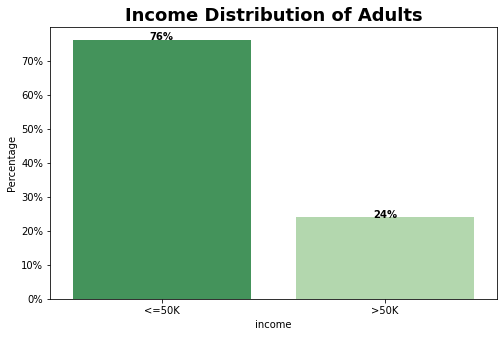

In [11]:
#sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
#vals = ax.get_yticks()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1), ha='center', fontweight='bold')

As you can see, the percentage number of people earning less than 50k dollar is 76%

<AxesSubplot:title={'center':'Density plot for Age'}, ylabel='Density'>

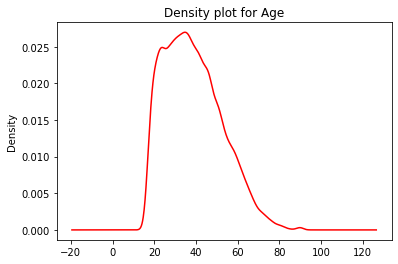

In [12]:
df['age'].plot(kind='kde', title='Density plot for Age', color='r')

We have positive skewed distribution of age. The highest density for the age is between 30-40 years

<AxesSubplot:title={'center':'Density plot for hours-per-week'}, ylabel='Density'>

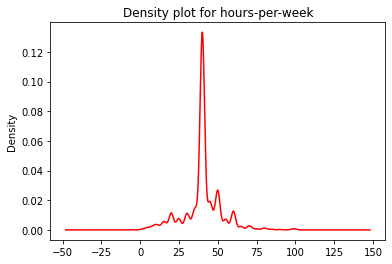

In [13]:
df['hours-per-week'].plot(kind='kde', title='Density plot for hours-per-week', color='r')

In [14]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    else:
        return "Greater than 60"

df['age_group'] = df['age'].apply(age_group)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Income of Individuals of Different Age Groups')

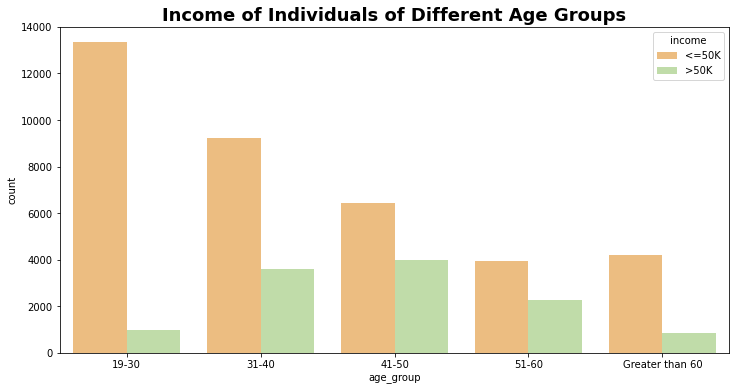

In [15]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', 'Greater than 60']
sns.countplot(df['age_group'], hue = df['income'], palette='Spectral', order = order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')


The largest number of people earning more than 50k is a age group 41-50

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '7652'),
 Text(0, 0, '927'),
 Text(0, 0, '1077'),
 Text(0, 0, '561'),
 Text(0, 0, '530'),
 Text(0, 0, '938'),
 Text(0, 0, '2'),
 Text(0, 0, '')]

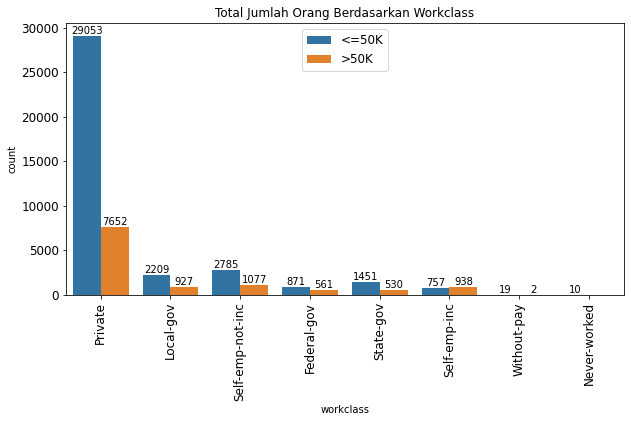

In [16]:
plt.figure(figsize=(10,5))

ax = sns.countplot(df['workclass'], hue = df['income'])
plt.title('Total Jumlah Orang Berdasarkan Workclass', fontsize=12)
plt.xticks(fontsize=12,rotation = 90)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

* Self Employed is one of the workclass categories that has an almost equal percentage between the number of people earning below 50k dollars and above 50k dollars
* The private sector has a significant difference. Approximately 75% difference between the number of people earning under 50k and over 50k

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '9918'), Text(0, 0, '1769')]

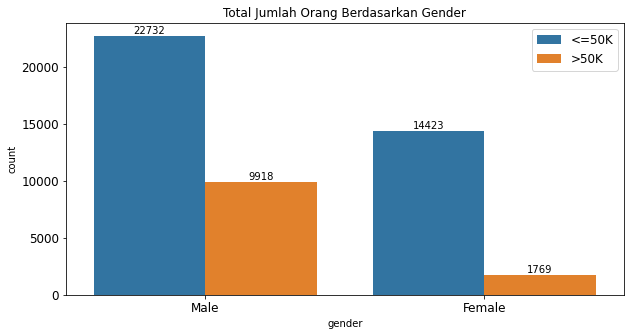

In [17]:
plt.figure(figsize=(10,5))

ax = sns.countplot(df['gender'], hue = df['income'])
plt.title('Total Jumlah Orang Berdasarkan Gender', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

* Less than 11% of the female gender generate income of more than 50k dollars in a year
* As for men, around 29% have an income of more than 50k dollars per year.

**Correlation Between Numerical Data**

In [18]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_group
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,19-30
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,31-40
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,19-30
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,41-50
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K,Greater than 60


<AxesSubplot:title={'center':' Education-Num vs Hours per week'}, xlabel='educational-num', ylabel='hours-per-week'>

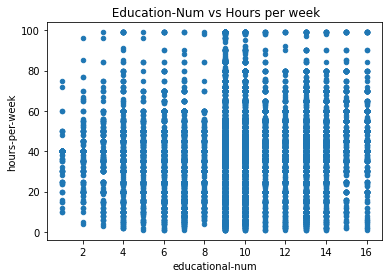

In [19]:
df.plot.scatter(x='educational-num', y ='hours-per-week', 
                title =' Education-Num vs Hours per week')

<AxesSubplot:title={'center':' Education-Num vs capital-gain'}, xlabel='educational-num', ylabel='capital-gain'>

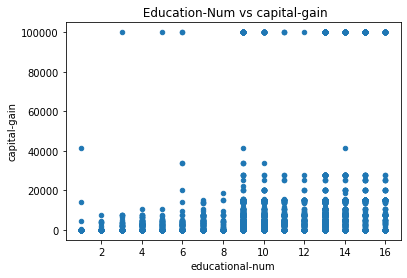

In [20]:
df.plot.scatter(x='educational-num', y ='capital-gain', 
                title =' Education-Num vs capital-gain')

<AxesSubplot:title={'center':' hours-per-week vs capital-gain'}, xlabel='hours-per-week', ylabel='capital-gain'>

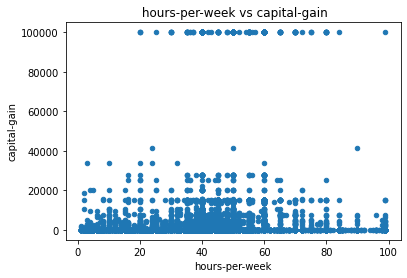

In [21]:
df.plot.scatter(x='hours-per-week', y ='capital-gain', 
                title =' hours-per-week vs capital-gain')

Based on the scatter plt, There are no interisting pattern from the visualization

<AxesSubplot:>

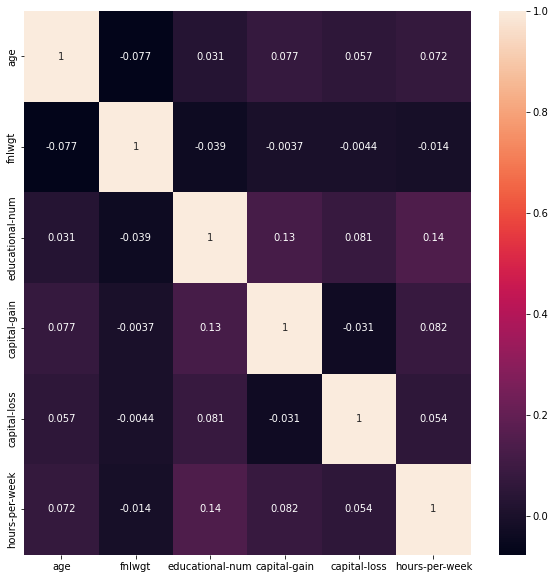

In [22]:

plt.figure(figsize=(10, 10))
sns.heatmap( 
            df.corr(),
            
            annot=True
)

Based on his, there is no strong correlation between the numerical features